In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import pandas as pd

In [10]:
SALMONELLA_PATH = "Salmonella_Enterica_Model_Table.csv"
STAPH_PATH = "Staphylococcus_Aureus_Model_Table.csv"
Model = "Staphylococcus Aureus"

df = pd.read_csv(STAPH_PATH)

## Correlation Matrix

In [11]:
df_cleaned = df.drop(columns=['Species', 'Dataset', 'File Name', 'clusters'])

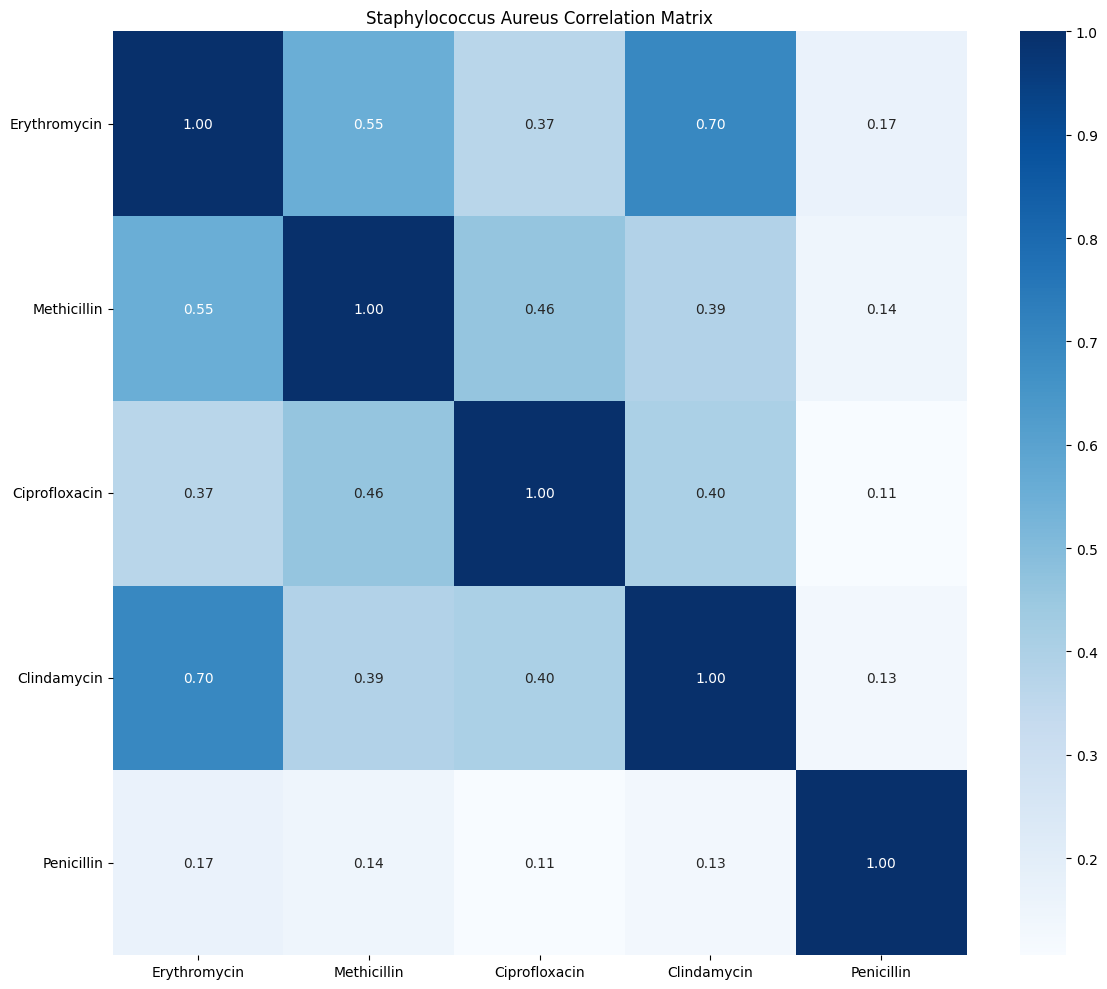

,Erythromycin,Methicillin,Ciprofloxacin,Clindamycin,Penicillin
Erythromycin,1.000000,0.553319,0.365408,0.699039,0.166684
Methicillin,0.553319,1.000000,0.459016,0.387414,0.144447
Ciprofloxacin,0.365408,0.459016,1.000000,0.403374,0.106010
Clindamycin,0.699039,0.387414,0.403374,1.000000,0.130667
Penicillin,0.166684,0.144447,0.106010,0.130667,1.000000


In [12]:
def wrap_labels(labels, width):
    """Wrap axis tick labels to a specified character width."""
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

def plot_and_save_correlation_matrix(df, title, filename):
    """
    Calculates, plots, and saves the correlation matrix for a DataFrame
    with categorical 'S', 'I', 'R' values, with wrapped axis labels.
    """
    mapping = {'S': 0, 'I': 1, 'R': 2}
    df_numeric = df.apply(lambda x: x.map(mapping))
    correlation_matrix = df_numeric.corr()

    # Wrap labels (adjust width if needed)
    wrapped_labels = wrap_labels(correlation_matrix.columns, width=15)

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='Blues',
                fmt=".2f",
                xticklabels=wrapped_labels,
                yticklabels=wrap_labels(correlation_matrix.index, width=15))

    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.title(title)
    plt.tight_layout()  # Prevent clipping
    plt.savefig(filename)
    plt.show()
    display(correlation_matrix)

# Apply the function to the df
plot_and_save_correlation_matrix(df_cleaned, f'{Model} Correlation Matrix', f'{Model}_Correlation_Matrix.png')

## Null %

In [13]:
# Calculate the percentage of null values for each column in the df
df_null_percentages_per_drug = df.isnull().mean() * 100

# Calculate the overall percentage of null values in the df
df_overall_null_percentage = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100

# Display the null percentages for each column.
print("Null Percentages per Drug:")
display(df_null_percentages_per_drug)

# Display the overall null percentage.
print("\nOverall Null Percentage:")
display(df_overall_null_percentage)

# Save the null percentages for each column to a CSV file
df_null_percentages_per_drug.to_csv(f'{Model}_Null_Percentages_Per_Drug.csv')

# Save the overall null percentage to a CSV file
# Convert the single value to a pandas Series or DataFrame for saving
overall_null_percentage_series = pd.Series(df_overall_null_percentage, name="Overall Null Percentage")
overall_null_percentage_series.to_csv(f'{Model}_Overall_Null_Percentage.csv', header=True)

Null Percentages per Drug:


,0
Species,0.000000
Dataset,0.000000
File Name,0.000000
Erythromycin,17.746048
Methicillin,34.455210
Ciprofloxacin,23.185450
Clindamycin,39.469658
Penicillin,36.070032
clusters,0.000000



Overall Null Percentage:


np.float64(16.769599788467712)